In [1]:
import pytorch_lightning as pl

In [1]:
import sys
sys.path.append("/alpha-graph")
from project.modules.simulation.diffusion_models import generators, params_sampler
from project.modules.simulation.traj_tools import get_traj_scale
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(context='notebook')
%config InlineBackend.figure_format = 'svg'

# Example of subdiffusive 2D walks

In [21]:
t_fBM = generators[2]["fBM"](T=30,alpha=.5)
t_CTRW = generators[2]["CTRW"](T=30,alpha=.5)
t_sBM = generators[2]["sBM"](T=30,alpha=.5)

t_fBM /= get_traj_scale(t_fBM)
t_sBM /= get_traj_scale(t_sBM)
t_CTRW /= get_traj_scale(t_CTRW)

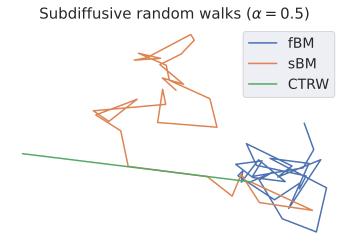

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t_fBM[:,0],t_fBM[:,1],label="fBM")
ax.plot(t_sBM[:,0],t_sBM[:,1],label="sBM")
ax.plot(t_CTRW[:,0],t_CTRW[:,1],label="CTRW")
ax.legend(fontsize=14)
plt.axis("off")
ax.set_title("Subdiffusive random walks ($\\alpha = 0.5$)",fontsize=15);
plt.savefig("/gaia/figures/imagingviruses/example_subdiffusive.pdf")

In [138]:
t_fBM = generators[2]["fBM"](T=30,alpha=1.5)
t_LW = generators[2]["LW"](T=30,alpha=1.5)
t_sBM = generators[2]["sBM"](T=30,alpha=1.5)

t_fBM /= get_traj_scale(t_fBM)
t_sBM /= get_traj_scale(t_sBM)
t_LW /= get_traj_scale(t_LW)

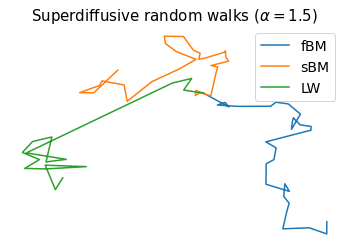

In [139]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t_fBM[:,0],t_fBM[:,1],label="fBM")
ax.plot(t_sBM[:,0],t_sBM[:,1],label="sBM")
ax.plot(t_LW[:,0],t_LW[:,1],label="LW")
ax.legend(fontsize=14)
plt.axis("off")
ax.set_title("Superdiffusive random walks ($\\alpha = 1.5$)",fontsize=15);
plt.savefig("/gaia/figures/imagingviruses/example_superdiffusive.pdf")

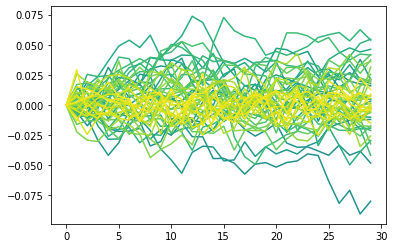

In [3]:
cmap = plt.get_cmap("viridis")
fig = plt.figure()
params = params_sampler("OU")
for i in range(50,100):
    params["log_theta"] = 4.*i/100
    traj = generators[1]["OU"](T=30,**params)
    plt.plot(traj,c=cmap(params["log_theta"]/4))

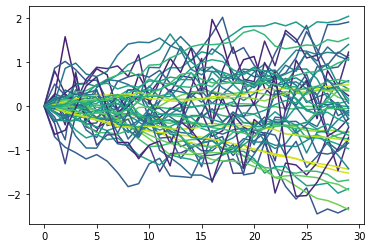

In [4]:
cmap = plt.get_cmap("viridis")
fig = plt.figure()
for i in range(50,100):
    params = params_sampler("fBM")
    traj = generators[1]["fBM"](T=30,**params)
    plt.plot(traj,c=cmap(params["alpha"]/2))

In [25]:
def get_MSD_curve(trajs):
    MSD = np.mean((trajs[:]-trajs[:,:1])**2,axis=0)
    MSD /= MSD[1]
    return MSD

In [81]:
T = 30
N = 10000
trajs_BM = np.stack([generators[1]["BM"](T=T,alpha=1) for i in range(N)],axis=0)[:,:,0]
trajs_OU_1 = np.stack([generators[1]["OU"](T=T,log_theta=2,sigma=1.) for i in range(N)],axis=0)[:,:,0]
trajs_OU_2 = np.stack([generators[1]["OU"](T=T,log_theta=2.5,sigma=1.) for i in range(N)],axis=0)[:,:,0]
trajs_OU_3 = np.stack([generators[1]["OU"](T=T,log_theta=3,sigma=1.) for i in range(N)],axis=0)[:,:,0]
step = .2
trajs_drift_1 = np.stack([generators[1]["BM"](T=T,alpha=1.) for i in range(N)],axis=0)[:,:,0] + np.arange(T)*step
step = .4
trajs_drift_2 = np.stack([generators[1]["BM"](T=T,alpha=1.) for i in range(N)],axis=0)[:,:,0] + np.arange(T)*step
step = .6
trajs_drift_3 = np.stack([generators[1]["BM"](T=T,alpha=1.) for i in range(N)],axis=0)[:,:,0] + np.arange(T)*step

In [82]:
MSD_BM = get_MSD_curve(trajs_BM)
MSD_OU_1 = get_MSD_curve(trajs_OU_1)
MSD_OU_2 = get_MSD_curve(trajs_OU_2)
MSD_OU_3 = get_MSD_curve(trajs_OU_3)
MSD_drift_1 = get_MSD_curve(trajs_drift_1)
MSD_drift_2 = get_MSD_curve(trajs_drift_2)
MSD_drift_3 = get_MSD_curve(trajs_drift_3)

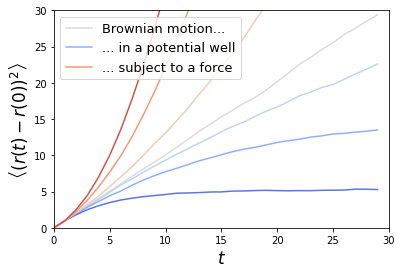

In [100]:
cm_drift = plt.cm.get_cmap("coolwarm")
plt.plot(MSD_BM,label="Brownian motion...",c=cm_drift(0.5))
plt.plot(MSD_OU_1,c=cm_drift(0.4))
plt.plot(MSD_OU_2,c=cm_drift(0.25),label="... in a potential well")
plt.plot(MSD_OU_3,c=cm_drift(0.1))
plt.plot(MSD_drift_1,c=cm_drift(0.6))
plt.plot(MSD_drift_2,c=cm_drift(0.75),label="... subject to a force")
plt.plot(MSD_drift_3,c=cm_drift(0.9))
#plt.xscale("log")
#plt.yscale("log")
plt.xlim((0,30))
plt.ylim((0,30))
plt.legend(fontsize=13)
plt.xlabel("$t$",fontsize=17)
plt.ylabel("$\left\langle (r(t)-r(0))^2 \\right\\rangle $",fontsize=17);
plt.savefig("/gaia/figures/imagingviruses/MSD.pdf")